## Import Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math
import cv2

# Load Dataset

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Plot digits random from the train set

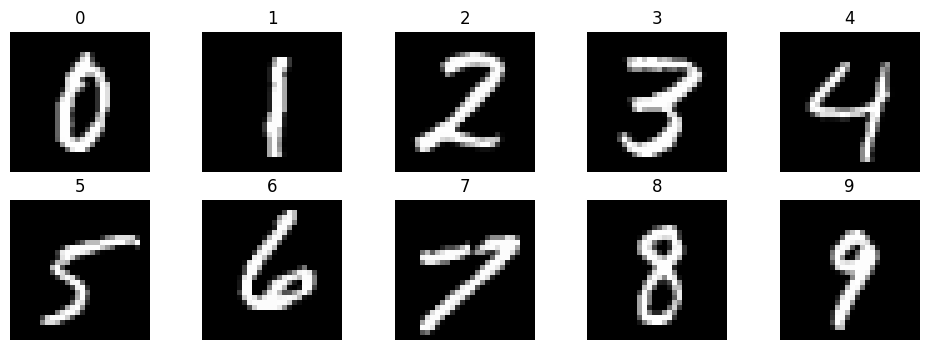

In [17]:
plt.figure(figsize=(12, 4))

for digit in range(10):

    i = np.where(y_train == digit)[0]


    random = np.random.choice(i)


    plt.subplot(2, 5, digit+1)
    plt.imshow(x_train[random], cmap="gray")
    plt.title(f"{digit}")
    plt.axis("off")

plt.show()


# Size of each image

In [18]:
x_train[0].shape

(28, 28)

Κάθε εικόνα έχει μέγεθος 28Χ28 δηλαδή 784 pixels.

Δεν είναι εξίσου σημαντικά όλα τα pixels.Κάποια από τα 0-pixels βοηθούν στη σωστή αναγνώριση του αριθμού, γιατί δείχνουν πού δεν υπάρχει ψηφίο και έτσι σχηματίζουν μαζί με τα άσπρα pixel το τελικό σχήμα.
Όμως, πολλά από τα 0-pixels είναι μακριά από το ψηφίο και δεν αλλάζουν ποτέ, οπότε αυτά δεν είναι τόσο σημαντικά.

# Transform images to vectors




In [19]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

# Train KNN model for different k values and evaluate it

In [20]:
k_values = [5, 15, 51, round(math.sqrt(x_train.shape[0]))]
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_train_pred=knn.predict(x_train)
    y_test_pred=knn.predict(x_test)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    train_acc.append(train_accuracy)
    test_accuracy=accuracy_score(y_test, y_test_pred)
    test_acc.append(test_accuracy)

print("k values:", k_values)
print("Train accuracies:",train_acc)
print("Test accuracies:",test_acc)


k values: [5, 15, 51, 245]
Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.92095]
Test accuracies: [0.9688, 0.9633, 0.9533, 0.9238]


# Plot Train and Test accuracies for k values



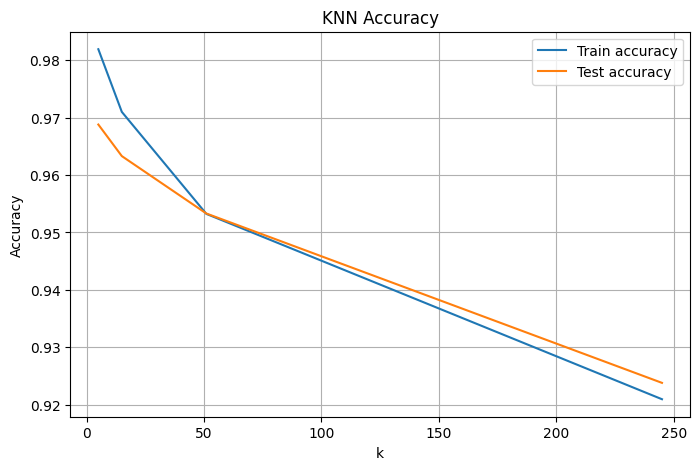

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_acc, label="Train accuracy")
plt.plot(k_values, test_acc , label="Test accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy")
plt.grid(True)
plt.legend()
plt.show()


# Normalization x_train and x_test to [0,1]

In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0


## For normalized datasets Train again KNN model for different k values and evaluate it

In [23]:
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_train_pred=knn.predict(x_train)
    y_test_pred=knn.predict(x_test)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    train_acc.append(train_accuracy)
    test_accuracy=accuracy_score(y_test, y_test_pred)
    test_acc.append(test_accuracy)

print("k values:", k_values)
print("Normalized Train accuracies:",train_acc)
print("Normalized Test accuracies:",test_acc)

k values: [5, 15, 51, 245]
Normalized Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.92095]
Normalized Test accuracies: [0.9688, 0.9633, 0.9533, 0.9238]


Η κανονικοποίηση συνήθως βελτιώνει την απόδοση του KNN,γιατί ο KNN βασίζεται σε αποστάσεις (Manhattan distance) και το εύρος των τιμών των χαρακτηριστικών έχει μεγάλη σημασία.Στο παραδειγμά μας όμως η απόδοση παραμένει ίδια.

# Digit design and classification check

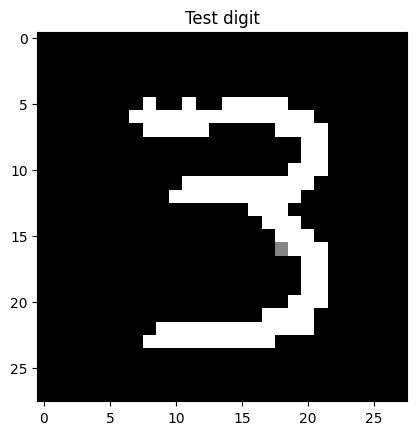

Predicted digit: 3


In [45]:
img = cv2.imread("paintTest.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Test digit")
plt.show()
img_vec = img.reshape(1, 28*28)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

pred =knn.predict(img_vec)
print("Predicted digit:", pred[0])
